# R/CareerGuidance Data Exploration

This notebook contains my data exploration for the subreddit [r/CareerGuidance](https://www.reddit.com/r/careerguidance/), a popular career guidance forum on Reddit. 

I want to see if I can find any change in patterns after March 2020. What kind of posts trended after the start of Coronavirus pandemic lockdown in the US?

### Preliminary Questions:

1. What is the average number of comments (posts with a higher amount of comments have more user engagement). Median number of commnets? Median score?
2. Are most posts (ranked top 1000 of all time) created before or after March 2020?
3. What is the post with the highest number of comments? (most engagement)?
4. if we subset the data frame by month, what is the top comment for each month? what is its score? which is the one with the highest amount of user engagement?
5. Other questions that come up after seeing the results of the above analysis (listed below)



In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../data/raw/posts_career_guidance.csv')
# that's how you do it:) (navigating up i mean)


df.shape
df.columns
df.head()

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created,date_created
0,0,Anyone else depressed?,1484,iuq5bq,careerguidance,https://www.reddit.com/r/careerguidance/commen...,315,"Anyone else in their mid-20s out of college, w...",1.600399e+09,2020-09-17 23:08:49
1,1,Are you seriously trying to quit your job duri...,1250,g4d70n,careerguidance,https://www.reddit.com/r/careerguidance/commen...,188,This will probably be downvoted to hell. That’...,1.587351e+09,2020-04-19 22:57:55
2,2,"Anyone else graduated, got in a 'career' and r...",1147,gh3k6s,careerguidance,https://www.reddit.com/r/careerguidance/commen...,233,It's probably the number 1 thing driving me in...,1.589154e+09,2020-05-10 19:32:34
3,3,"""wE'vE dEcIdEd NoT tO mOvE fOrWaRd At ThIs TiM...",1067,gx9vcl,careerguidance,https://www.reddit.com/r/careerguidance/commen...,315,I'm so sick of these emails. I want to scream ...,1.591410e+09,2020-06-05 22:17:40
4,4,Anyone else feel ‘trapped’ in their job becaus...,1014,i75f39,careerguidance,https://www.reddit.com/r/careerguidance/commen...,204,I’ve been in this shitty graduate job for almo...,1.597097e+09,2020-08-10 18:05:10


In [5]:
# let's rename these columns

df = df.rename(columns={'Unnamed: 0':'index'})

df.columns



Index(['index', 'title', 'score', 'id', 'subreddit', 'url', 'num_comments',
       'body', 'created', 'date_created'],
      dtype='object')

After some analysis, we find this data fram has :

- 1000 observations by 9 variables (10 if you count the pandas dataframe index).
- These variables are:
    - Post Title
    - Post Score in Upvotes / Downvotes
    - Post ID 
    - Subreddit Name 
    - Direct Url Link to Post 
    - Created in seconds (Computer Time)
    - Date Created (obtained from Computer Time)

### Next Steps 
I now want to

- [x] Find the median post score. 
- [x] Find the median number of comments 
- [x] Find the average number of comments 
- [x] Create month index column
- [x] Subset data frame by month
- [x] Find the most commented post from each month.
- [x] Find the most upvoted post from each month. Compare to most commented. 
- [x] The highest commented AND highest upvoted post of all time


### Why do I want these Statistics?

1. The median of a sample is less susepctible to outliers than the mean is, so it is better to use as something to compare scores with, but I also still want to see that mean!
2. I wannt to see how the top post by month changed during the progression of the Coronavirus Lockdown Period. 
3. More posts implies a higher level of user engagement, even if it is a very rough measurement of engagement. I wasnt to see which posts were most engaging. 
4. However, more upvotes implies more people "agree" with the sentiment the poster has. 
    



In [6]:
# median of entire data frame
# there are no missing values here

df.describe()


# I see why they use millisecond time, to make it easier to parse, hahaha. 
# to get the dates i will have to get creative and make a new column for month it was posted in. maybe date_created.contains??


# Average score: 208.5 points. 
# Average number of comments : 77.01
# Average post_date (whatever that means right now): Tuesday, January 7, 2020 6:50:00 PM (also known as 1.578423e+09) in epoch time. 

,index,score,num_comments,created
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,499.500000,208.505000,77.013000,1.578423e+09
std,288.819436,151.905943,55.806121,2.026603e+07
min,0.000000,73.000000,6.000000,1.486941e+09
25%,249.750000,113.000000,40.750000,1.563830e+09
50%,499.500000,164.500000,60.500000,1.581066e+09
75%,749.250000,252.750000,98.000000,1.595177e+09
max,999.000000,1484.000000,579.000000,1.608708e+09


In [7]:
# get some medians now

df['score'].median()
df['num_comments'].median()
df['created'].median()


# Median Report:
# median Score: 164.5
# median number of comments - 60.5
# Median date created/ posted: Friday, February 7, 2020 9:06:31 AM (a bit higher than the average date, does this mean top posts skew to before the pandemic?)

1581066391.0

In [8]:
# Now we subset by month by creating a new column called...."month", haha. 

df['month'] = df['date_created'] # initialize

df.columns[0]
df.columns[0] # this only returns a string haha

type(df['date_created'][2])
iter = 0

for x in df['date_created']:
    #print(iter)
    #print(df['date_created'][iter])

    # actual logic here
    if '2020-02' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'February'
        #print(df['month'][iter])
    if '2020-03' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'March'
        #print(df['month'][iter])
    if '2020-04' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'April'
        #print(df['month'][iter])
    if '2020-05' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'May'
        #print(df['month'][iter])
    if '2020-06' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'June'
        #print(df['month'][iter])
    if '2020-07' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'July'
        #print(df['month'][iter])
    if '2020-08' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'August'
        #print(df['month'][iter])
    if '2020-09' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'September'
        #print(df['month'][iter])
    if '2020-10' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'October'
        #print(df['month'][iter])
    if '2020-11' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'November'
        #print(df['month'][iter])
    if '2020-12' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'December'
        #print(df['month'][iter])
    iter+=1


#df.head()



In [9]:
 # was testing out logic here
 #print('2020-05' in df['date_created'][2])

 #print(df['date_created'][2])

In [17]:
is_feb = df['month']=='February'

feb_df = df[is_feb]
feb_df.head()

#print(march_df.shape)

# top comment from march now

print(feb_df.describe())


# get some medians now

# median score for march
#print(march_df['score'].median())

#  median number of comments for march
#print(march_df['num_comments'].median())



feb_df[feb_df['score']==feb_df['score'].max()]['date_created'] 
feb_df[feb_df['score']==feb_df['score'].max()].head()

feb_df.head()

feb_df.to_csv('career_feb.csv')



            index       score  num_comments       created
count   38.000000   38.000000     38.000000  3.800000e+01
mean   462.026316  207.210526     80.736842  1.581870e+09
std    253.796523  119.885341     57.424302  7.036037e+05
min     20.000000   78.000000     11.000000  1.580569e+09
25%    262.250000  145.250000     45.750000  1.581246e+09
50%    479.500000  170.500000     68.000000  1.581877e+09
75%    586.500000  244.000000     96.500000  1.582424e+09
max    988.000000  675.000000    300.000000  1.582995e+09


## March Analysis for r/CareerGuidance

| Statistic   | February Posts | March Posts | April Posts |--Top 1000 Form Posts of All Time--
| ----------- | ----------- | ----------- | ------------ |
| Number of Posts  | 38 |50   |  44  | 1000 |
| Average Post Score | 207 |267.42*| 245.70 | 208.5 | 
| Average Number of Comments| 80.74 | 99.98* |84.73| 77.01*
| Highest Number of Comments on Post | 300 | 457* |310 | 579 |
| Highest Post Score | 675 | 772 |1250 | 1484 |


In comparison to the top 1000 posts of all time on CareerGuidance, March had a higher average number of comments. To me, this implies a higher level of user engagement. 

#### Most interesting post from March Posts: 
[Post with hgihest num comments, march 15](https://www.reddit.com/r/careerguidance/comments/fitp9r/i_was_rejected_from_a_position_that_required_a/
)

[post with highest score, march 7](https://www.reddit.com/r/careerguidance/comments/fellu7/anyone_feel_depressed_after_being_on_linkedin/)     

In [11]:

is_march = df['month']=='March'

march_df = df[is_march]
march_df.head()

#print(march_df.shape)

# top comment from march now

print(march_df.describe())


# get some medians now

# median score for march
#print(march_df['score'].median())

#  median number of comments for march
#print(march_df['num_comments'].median())

march_df[march_df['num_comments']==457].head()

march_df[march_df['num_comments']==457]['date_created']     

march_df[march_df['score']==march_df['score'].max()]['date_created'] 
march_df[march_df['score']==march_df['score'].max()].head()


            index       score  num_comments       created
count   50.000000   50.000000     50.000000  5.000000e+01
mean   373.820000  267.420000     99.980000  1.584328e+09
std    283.033689  172.861758     75.297909  7.794127e+05
min     12.000000   82.000000     13.000000  1.583042e+09
25%    112.750000  141.500000     54.500000  1.583738e+09
50%    327.500000  217.500000     80.500000  1.584344e+09
75%    609.000000  346.000000    137.250000  1.584936e+09
max    927.000000  772.000000    457.000000  1.585688e+09


,index,title,score,id,subreddit,url,num_comments,body,created,date_created,month
12,12,Anyone feel depressed after being on LinkedIn?,772,fellu7,careerguidance,https://www.reddit.com/r/careerguidance/commen...,151,I've often felt mildly depressed after being o...,1.583563e+09,2020-03-07 01:38:21,March


## April Analysis for r/CareerGuidance

| Statistic   | March Posts | --Top 1000 Form Posts of All Time--
| ----------- | ----------- | ----------- |
| Number of Posts  | 44       | 1000 |
| Average Post Score | 84.727273 | 208.5 | 
| Average Number of Comments| 84.727 | 77.01*
| Highest Number of Comments on Post | 310  | 579 |
| Highest Post Score | 1250*** | 1484 |

### interesting post from April:

[highest post score](https://www.reddit.com/r/careerguidance/comments/g4d70n/are_you_seriously_trying_to_quit_your_job_during/)

Now this one is interesting. it's actually the second highest top comment of all time!!!! and it's about job security during the pandemic. The comments are full of people in the service industry who cannot find work. 



In [12]:
is_april = df['month']=='April'

april_df = df[is_april]
april_df.head()

print(april_df.shape)

# top comment from march now

print(april_df.describe())


# get some medians now

# median score for march
print(april_df['score'].median())

#  median number of comments for march
print(april_df['num_comments'].median())


april_df[april_df['score']==april_df['score'].max()]['date_created'] 
april_df[april_df['score']==april_df['score'].max()].head()

(44, 11)
            index        score  num_comments       created
count   44.000000    44.000000     44.000000  4.400000e+01
mean   407.090909   245.704545     84.727273  1.587033e+09
std    270.330187   188.624714     58.680992  7.663071e+05
min      1.000000    78.000000     17.000000  1.585813e+09
25%    205.500000   149.750000     53.750000  1.586328e+09
50%    379.000000   197.000000     69.000000  1.587034e+09
75%    566.250000   275.250000     96.750000  1.587695e+09
max    987.000000  1250.000000    310.000000  1.588285e+09
197.0
69.0


,index,title,score,id,subreddit,url,num_comments,body,created,date_created,month
1,1,Are you seriously trying to quit your job duri...,1250,g4d70n,careerguidance,https://www.reddit.com/r/careerguidance/commen...,188,This will probably be downvoted to hell. That’...,1.587351e+09,2020-04-19 22:57:55,April


In [13]:
is_may = df['month']=='May'

may_df = df[is_may]
may_df.head()

#print(march_df.shape)

# top comment from march now

#print(may_df.describe())


# get some medians now

# median score for march
#print(may_df['score'].median())

#  median number of comments for march
#print(may_df['num_comments'].median())

may_df[may_df['num_comments']==may_df['num_comments'].max()]['date_created']
may_df[may_df['num_comments']==may_df['num_comments'].max()].head()


may_df[may_df['score']==may_df['score'].max()]['date_created'] 
may_df[may_df['score']==may_df['score'].max()].head()


may_df.head()

may_df.to_csv('career_may.csv')


# What are the total posts by year?

Is 2020 overrepresented in the top 1000 posts?

In [14]:
# count representation by year
ct_2020 = 0
ct_2019 = 0
ct_2018 = 0
ct_2017 = 0
ct_2016 = 0

for x in df['date_created']:
    if '2020' in x:
        ct_2020 += 1
    if '2019' in x:
        ct_2019 += 1
    if '2018' in x:
        ct_2018 += 1
    if '2017' in x:
        ct_2017 += 1
    if '2016' in x:
        ct_2016 += 1

print(ct_2020, ct_2019, ct_2018, ct_2017, ct_2016)

547 383 67 3 0


ok there turned out to be a huge difference!!!!!

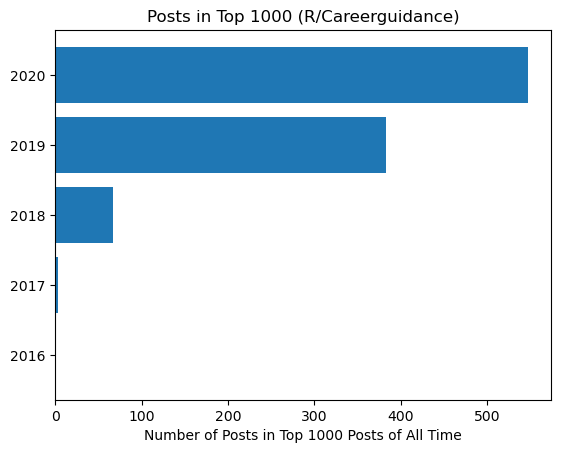

In [15]:
labels = ['2020', '2019', '2018','2017','2016']
import matplotlib.pyplot as plt
import numpy as np


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
years = ('2020', '2019', '2018','2017','2016')
y_pos = np.arange(len(years))
num_posts = [547,383,67,3,0]

ax.barh(y_pos, num_posts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(years)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Posts in Top 1000 Posts of All Time')
ax.set_title('Posts in Top 1000 (R/Careerguidance)')

plt.show()
